In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
import os
from geopy.distance import geodesic
import geopy.distance
import datetime


In [45]:
## Station Data##
file_path = '/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/staion_1113.csv'
swap_station_data = pd.read_csv(file_path)
#end_time = '2023-05-12 14:50:29'
#swap_station_data = swap_station_data[swap_station_data['create_time'] < end_time]

/var/folders/r3/yyv6b4257cz1wxtwcbkbd2sm0000gn/T/ipykernel_25138/194562.py:3: DtypeWarning: Columns (13,15,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  swap_station_data = pd.read_csv(file_path)


In [46]:
# sort station data in their id and then time
swap_station_data = swap_station_data.sort_values(by=["station_code", "create_time"])
# create new variable to only have 4 columns
swap_station_data_1 = swap_station_data[['station_code', 'longitude', 'latitude', 'battery_count']]
# drop all na data and recurring station to only keep the unique station
swap_station_data_1 = swap_station_data_1.dropna()
station_location_data = swap_station_data_1.drop_duplicates(subset='station_code', keep='first')
station_location_data = station_location_data.reset_index(drop=True)

In [4]:
station_location_data_origina=station_location_data.copy()

In [5]:

for i in range(1, 9):
    column_name = f'battery_0{i}_code'
    swap_station_data[column_name] = swap_station_data[column_name].apply(lambda x: x if str(x).startswith('BB') else np.nan)


In [51]:
## Scooter data##
file_path =  '/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_removes.csv'
scooter_data = pd.read_csv(file_path)
#end_time = '2023-05-12 14:50:29'
#scooter_data = scooter_data[scooter_data['create_time'] < end_time]
scooter_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','id'], inplace=True)

In [64]:
file_path ='/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/scooter_data_swap.csv'
scooter_data_swapped = pd.read_csv(file_path)
#end_time = '2023-05-12 14:50:29'
#swap_scooter_data = swap_scooter_data[swap_scooter_data['create_time'] < end_time]
#scooter_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','id'], inplace=True)
scooter_data_swapped.drop(columns=['Unnamed: 0.2','Unnamed: 0.1', 'Unnamed: 0','id'], inplace=True)

In [55]:
swap_station_data['battery_01_code'].nunique()+swap_station_data['battery_02_code'].nunique()+swap_station_data['battery_03_code'].nunique()
+swap_station_data['battery_04_code'].nunique()+swap_station_data['battery_05_code'].nunique()+swap_station_data['battery_06_code'].nunique()
+swap_station_data['battery_07_code'].nunique()+swap_station_data['battery_08_code'].nunique()

3856

In [66]:
battery_check=pd.DataFrame()

In [71]:
battery_check['total_battery'] = pd.concat([swap_station_data['battery_01_code'], swap_station_data['battery_02_code'], swap_station_data['battery_03_code'], 
                                             swap_station_data['battery_04_code'], swap_station_data['battery_05_code'], swap_station_data['battery_06_code'],
                                             swap_station_data['battery_07_code'], swap_station_data['battery_08_code']])
battery_check.dropna()

,total_battery
0,BB17052200010404
1,BB17052200010404
2,BB17052200010404
3,BB17052200010404
4,BB17052200010404
...,...
237243,BB23122200479909
237244,BB23122200479909
237245,BB23122200479909
237246,BB23122200479909


In [75]:
scooter_data

,scooter_code,longitude,latitude,ODO,速度 km/h,battery_code,soc,电池最高温度℃,电池最低温度℃,系统mos最高温度℃,create_time,closest_station_code,next_longitude,next_latitude,t_distance
0,MC02122200002007,106.941749,-6.184658,0.1,0,BB17052200070404,71,33.0,33.0,34.0,2023-05-12 10:30:30,SS23052210008204,106.941433,-6.184447,0.042043
1,MC02122200002007,106.941433,-6.184447,0.1,0,BB23122200433609,38,30.0,30.0,31.0,2023-05-12 10:40:30,SS23052210008204,106.941729,-6.184822,0.052849
2,MC02122200002007,106.941729,-6.184822,0.1,0,BB23122200433609,38,30.0,30.0,31.0,2023-05-12 10:50:30,SS23052210008204,106.941546,-6.184773,0.020966
3,MC02122200002007,106.941483,-6.184825,0.1,0,BB23122200433609,36,31.0,31.0,33.0,2023-05-12 12:20:30,SS23052210008204,106.941561,-6.184772,0.010434
4,MC02122200002007,106.941536,-6.184787,0.1,0,BB23122200433609,33,33.0,33.0,34.0,2023-05-12 13:50:30,SS23052210008204,106.941512,-6.184881,0.010729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362385,MC29112200510006,106.816174,-6.196657,5524.2,0,BB23122200337509,58,37.0,37.0,38.0,2023-05-13 12:30:30,SS23052210017104,106.812405,-6.209519,1.482274
362386,MC29112200510006,106.812379,-6.209534,5524.2,0,BB23122200337509,57,36.0,36.0,37.0,2023-05-13 13:50:30,SS06032100046402,106.812595,-6.205809,0.412631
362387,MC29112200510006,106.812593,-6.205821,5524.2,0,BB31102210025308,92,40.0,40.0,41.0,2023-05-13 15:30:30,SS06032100046402,106.813955,-6.215229,1.051267
362388,MC29112200510006,106.813981,-6.215195,5524.2,0,BB31102210025308,91,40.0,39.0,39.0,2023-05-13 16:20:30,SS23052210000604,106.809759,-6.208946,0.834198


In [72]:
check_1=scooter_data['battery_code'].isin(battery_check['total_battery'])

In [61]:
scooter_data['battery_code'].nunique()

4832

In [60]:
pd.set_option('display.max_columns',50)

In [65]:
grouped = swap_station_data.groupby('station_code')
# Get all the scooter codes as a list
scooter_codes = list(grouped.groups)
# Get 5th group data to test
specific_scooter=scooter_codes[5]
specific_group = grouped.get_group(specific_scooter)
specific_group=specific_group.reset_index(drop=True)

In [16]:
d=pd.DataFrame()
k=0
for group_name, group_data in grouped:
    for i in range(1, 9):
        group_data[f'next_battery_0{i}_code'] = group_data[f'battery_0{i}_code'].shift(-1)
        group_data[f'swap{i}_binary'] = 0
        for index, row in group_data.iterrows():
            if row[f'next_battery_0{i}_code'] != row[f'battery_0{i}_code']:
                group_data.at[index, f'swap{i}_binary'] = 1
            else:
                group_data.at[index, f'swap{i}_binary'] = 0
            if pd.isna(row[f'next_battery_0{i}_code'])==1:
                group_data.at[index, f'swap{i}_binary']=0

    group_data = group_data.drop(group_data.index[-1])
    print(k)
    k=k+1
    d=pd.concat([d,group_data], axis=0)
d.to_csv('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/aizen/station_data_swap.csv')             
station_data_swap=d

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271


In [17]:
station_data_swap['total_swap']=station_data_swap['swap1_binary']+station_data_swap['swap2_binary']+station_data_swap['swap3_binary']+station_data_swap['swap4_binary']
+station_data_swap['swap5_binary']+station_data_swap['swap6_binary']+station_data_swap['swap7_binary']+station_data_swap['swap8_binary']

0         0
1         0
2         0
3         0
4         0
         ..
238125    0
238126    0
238127    0
238128    0
238129    0
Length: 245615, dtype: int64

In [18]:
station_data_swap['total_swap'].sum()

20461

# 1. match scooter match with station data

## a) scooter Grouping

In [19]:
grouped_scooter = swap_scooter_data.groupby('create_time')
# Get all the scooter codes as a list
scooter_codes = list(grouped_scooter.groups)
# Get 5th group data to test
specific_scooter=scooter_codes[0]
specific_scooter_group = grouped_scooter.get_group(specific_scooter)
specific_scooter_group=specific_scooter_group.reset_index(drop=True)

aa = specific_scooter_group['closest_station_code'].value_counts()
aa = pd.DataFrame(aa)
aa['station_code'] = aa.index
mapping_dict = aa.set_index('station_code')['closest_station_code'].to_dict()
station_location_data['n_scooters'] = station_location_data['station_code'].map(mapping_dict)
station_location_data['n_scooters'].fillna(0, inplace=True)      
station_location_data['create_time']=group_data['create_time'].iloc[0]



## b) Station Grouping

In [20]:
grouped_station = station_data_swap.groupby('create_time')
# Get all the scooter codes as a list
station_codes = list(grouped_station.groups)
# Get 5th group data to test
specific_station=station_codes[0]
specific_station_group = grouped_station.get_group(specific_station)
specific_station_group=specific_station_group.reset_index(drop=True)


## C) Matching

In [21]:
    grouped_scooter = swap_scooter_data.groupby('create_time')
    # Get all the scooter codes as a list
    scooter_codes = list(grouped_scooter.groups)
    # Get 5th group data to test
    specific_scooter=scooter_codes[1]
    specific_scooter_group = grouped_scooter.get_group(specific_scooter)
    specific_scooter_group=specific_scooter_group.reset_index(drop=True)
    station_location_data=station_location_data_origina
    aa = specific_scooter_group['closest_station_code'].value_counts()
    aa = pd.DataFrame(aa)
    aa['station_code'] = aa.index
    mapping_dict = aa.set_index('station_code')['closest_station_code'].to_dict()
    station_location_data['n_scooters'] = station_location_data['station_code'].map(mapping_dict)
    station_location_data['n_scooters'].fillna(0, inplace=True)      
    station_location_data['create_time']=group_data['create_time'].iloc[0]


    grouped_station = station_data_swap.groupby('create_time')
    # Get all the scooter codes as a list
    station_codes = list(grouped_station.groups)
    # Get 5th group data to test
    specific_station=station_codes[1]
    specific_station_group = grouped_station.get_group(specific_station)
    specific_station_group=specific_station_group.reset_index(drop=True)
    specific_station_group=specific_station_group[specific_station_group['total_swap']>0]

    aa=pd.DataFrame()
    aa=pd.concat([specific_station_group['next_battery_01_code'],specific_station_group['next_battery_02_code'],specific_station_group['next_battery_03_code'],specific_station_group['next_battery_04_code']
                ,specific_station_group['next_battery_05_code'],specific_station_group['next_battery_06_code'],specific_station_group['next_battery_07_code'],specific_station_group['next_battery_08_code']
                  ])
    aa=aa.dropna()
    aa=pd.DataFrame(aa)
    aa.reset_index(inplace=True)

    aa['A_in_B'] = aa[0].isin(specific_scooter_group['next_battery_code'])
    station_matched=specific_station_group['total_swap'].sum()
    scooter_matched=station_location_data['n_scooters'].sum()
    matched=aa['A_in_B'].sum()

    print(station_matched,scooter_matched,matched)

35 40.0 0


In [22]:
station_location_data['n_scooters'].sum()

40.0

In [23]:
time=specific_station_group['create_time'].iloc[0]

In [40]:
def scooter_station_match(nth):
    grouped_scooter = swap_scooter_data.groupby('create_time')
    # Get all the scooter codes as a list
    scooter_codes = list(grouped_scooter.groups)
    # Get 5th group data to test
    specific_scooter=scooter_codes[nth]
    specific_scooter_group = grouped_scooter.get_group(specific_scooter)
    specific_scooter_group=specific_scooter_group.reset_index(drop=True)
    station_location_data=station_location_data_origina
    aa = specific_scooter_group['closest_station_code'].value_counts()
    aa = pd.DataFrame(aa)
    aa['station_code'] = aa.index
    mapping_dict = aa.set_index('station_code')['closest_station_code'].to_dict()
    station_location_data['n_scooters'] = station_location_data['station_code'].map(mapping_dict)
    station_location_data['n_scooters'].fillna(0, inplace=True)      
    station_location_data['create_time']=group_data['create_time'].iloc[0]


    grouped_station = station_data_swap.groupby('create_time')
    # Get all the scooter codes as a list
    station_codes = list(grouped_station.groups)
    # Get 5th group data to test
    specific_station=station_codes[nth]
    specific_station_group = grouped_station.get_group(specific_station)
    specific_station_group=specific_station_group.reset_index(drop=True)
    specific_station_group=specific_station_group[specific_station_group['total_swap']>0]

    aa=pd.DataFrame()
    aa=pd.concat([specific_station_group['next_battery_01_code'],specific_station_group['next_battery_02_code'],specific_station_group['next_battery_03_code'],specific_station_group['next_battery_04_code']
                ,specific_station_group['next_battery_05_code'],specific_station_group['next_battery_06_code'],specific_station_group['next_battery_07_code'],specific_station_group['next_battery_08_code']
                  ])
    aa=aa.dropna()
    aa=pd.DataFrame(aa)
    aa.reset_index(inplace=True)

    aa['A_in_B'] = aa[0].isin(specific_scooter_group['next_battery_code'])
    station_matched=specific_station_group['total_swap'].sum()
    scooter_matched=station_location_data['n_scooters'].sum()
    matched=aa['A_in_B'].sum()
    #time=specific_station_group['create_time'].iloc[0]
    return station_matched,scooter_matched,matched

In [37]:
matched

0

In [41]:
aa=[]
bb=[]
cc=[]
dd=[]
for i in range(1,897):
    nth=i
    [a,b,c]=scooter_station_match(nth)
    aa.append(a)
    bb.append(b)
    cc.append(c)
    #dd.append(d)
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [42]:
largest1 = max(aa)
aa.remove(largest1)
largest2 = max(aa)
aa.remove(largest2)

largest1 = max(bb)
bb.remove(largest1)
largest2 = max(bb)
bb.remove(largest2)

largest1 = max(cc)
cc.remove(largest1)
largest2 = max(cc)
cc.remove(largest2)

Text(0.5, 1.0, 'matched')

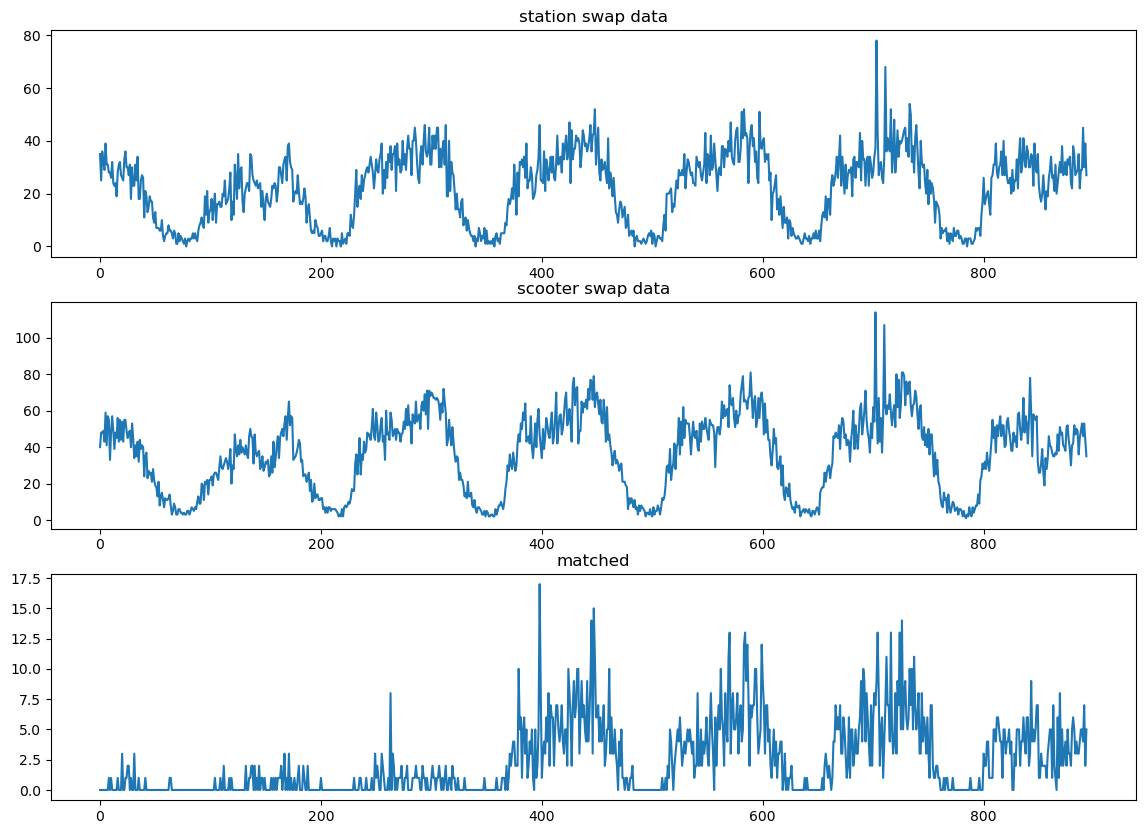

In [43]:
plt.figure(figsize=(14,10))

plt.subplot(3,1,1)
plt.plot(aa)
plt.title('station swap data')

plt.subplot(3,1,2)
plt.plot(bb)
plt.title('scooter swap data')

plt.subplot(3,1,3)
plt.plot(cc)
plt.title('matched')

# D) matching 2

In [62]:
scooter_data

,scooter_code,longitude,latitude,ODO,速度 km/h,battery_code,soc,电池最高温度℃,电池最低温度℃,系统mos最高温度℃,create_time,closest_station_code,next_longitude,next_latitude,t_distance
0,MC02122200002007,106.941749,-6.184658,0.1,0,BB17052200070404,71,33.0,33.0,34.0,2023-05-12 10:30:30,SS23052210008204,106.941433,-6.184447,0.042043
1,MC02122200002007,106.941433,-6.184447,0.1,0,BB23122200433609,38,30.0,30.0,31.0,2023-05-12 10:40:30,SS23052210008204,106.941729,-6.184822,0.052849
2,MC02122200002007,106.941729,-6.184822,0.1,0,BB23122200433609,38,30.0,30.0,31.0,2023-05-12 10:50:30,SS23052210008204,106.941546,-6.184773,0.020966
3,MC02122200002007,106.941483,-6.184825,0.1,0,BB23122200433609,36,31.0,31.0,33.0,2023-05-12 12:20:30,SS23052210008204,106.941561,-6.184772,0.010434
4,MC02122200002007,106.941536,-6.184787,0.1,0,BB23122200433609,33,33.0,33.0,34.0,2023-05-12 13:50:30,SS23052210008204,106.941512,-6.184881,0.010729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362385,MC29112200510006,106.816174,-6.196657,5524.2,0,BB23122200337509,58,37.0,37.0,38.0,2023-05-13 12:30:30,SS23052210017104,106.812405,-6.209519,1.482274
362386,MC29112200510006,106.812379,-6.209534,5524.2,0,BB23122200337509,57,36.0,36.0,37.0,2023-05-13 13:50:30,SS06032100046402,106.812595,-6.205809,0.412631
362387,MC29112200510006,106.812593,-6.205821,5524.2,0,BB31102210025308,92,40.0,40.0,41.0,2023-05-13 15:30:30,SS06032100046402,106.813955,-6.215229,1.051267
362388,MC29112200510006,106.813981,-6.215195,5524.2,0,BB31102210025308,91,40.0,39.0,39.0,2023-05-13 16:20:30,SS23052210000604,106.809759,-6.208946,0.834198


In [63]:
grouped_scooter = scooter_data_swapped.groupby('create_time')
# Get all the scooter codes as a list
scooter_codes = list(grouped_scooter.groups)
# Get 5th group data to test
specific_scooter=scooter_codes[0]
specific_scooter_group = grouped_scooter.get_group(specific_scooter)
specific_scooter_group=specific_scooter_group.reset_index(drop=True)

aa = specific_scooter_group['closest_station_code'].value_counts()
aa = pd.DataFrame(aa)
aa['station_code'] = aa.index
mapping_dict = aa.set_index('station_code')['closest_station_code'].to_dict()
station_location_data['n_scooters'] = station_location_data['station_code'].map(mapping_dict)
station_location_data['n_scooters'].fillna(0, inplace=True)      
station_location_data['create_time']=group_data['create_time'].iloc[0]

In [ ]:
grouped_station = station_data_swap.groupby('scooter_code')
# Get all the scooter codes as a list
station_codes = list(grouped_station.groups)
# Get 5th group data to test
specific_station=station_codes[0]
specific_station_group = grouped_station.get_group(specific_station)
specific_station_group=specific_station_group.reset_index(drop=True)
